<a href="https://colab.research.google.com/github/AthiraBinod-19/Computer_vision/blob/main/Image_Forgery_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project detects image forgery using OpenCV and Python. An image from the CoMoFoD(Copy-Move-Forgery Detection)dataset were analyzed to identify manipulated regions. Techniques like SIFT-based copy–move detection and pixel difference analysis were applied to compare original and forged image, highlighting tampered areas for use in digital forensics and image authentication.

In [3]:
#Upload both original and forged images
from google.colab import files
uploaded = files.upload()

Saving 028_O.png to 028_O (1).png
Saving 028_F.png to 028_F (1).png


In [4]:
#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Define filenames
original_path = "028_O.png"
forged_path   = "028_F.png"

In [9]:
#Load both images
orig = cv2.imread(original_path)
forged = cv2.imread(forged_path)

if orig is None or forged is None:
    print("❌ Could not load one or both images.")
else:
    print("Both images loaded successfully!")

Both images loaded successfully!


In [10]:
#Resize to same size (for easy comparison)
h, w = forged.shape[:2]
orig = cv2.resize(orig, (w, h))

In [12]:
#Compute absolute difference
diff = cv2.absdiff(orig, forged)
diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(diff_gray, 30, 255, cv2.THRESH_BINARY)

In [16]:
#Highlight differences in red on the forged image
forged_highlight = forged.copy()
forged_highlight[mask > 0] = [0, 0, 255]  # mark changes in red

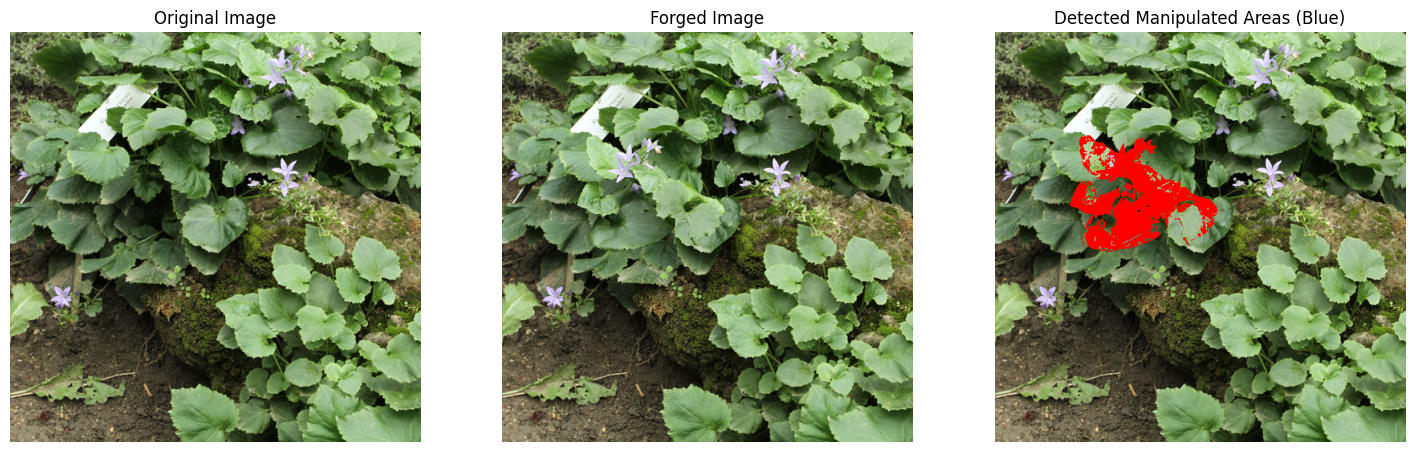

In [17]:
#Display all results side by side
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(forged, cv2.COLOR_BGR2RGB))
plt.title("Forged Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(forged_highlight, cv2.COLOR_BGR2RGB))
plt.title("Detected Manipulated Areas (Red)")
plt.axis('off')

plt.show()
